In [59]:
import numpy as np
import pandas as pd

# packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# package for preprocessing
from sklearn import preprocessing

pd.set_option('display.max_columns', None)

# 1) Data Loading & First Insights

In [30]:
# load the data
df = pd.read_pickle('../results/extracted_features_modified.pkl')
df.columns.to_list()

['file',
 'label',
 'speaker',
 'gender',
 'duration',
 'mean',
 'median',
 'max',
 'min',
 'var',
 'std',
 'zcr',
 'energy',
 'energy_avg_change_rate',
 'duration_rising_energy',
 'duration_falling_energy',
 'value_rising_energy',
 'value_falling_energy',
 'rms',
 'log_rms',
 'amplitude',
 'amplitude_avg_change_rate',
 'lpc',
 'spectral_entropy',
 'shannon_entropy',
 'threshold_entropy',
 'log_energy_entropy',
 'sure_entropy',
 'f0',
 'voiced',
 'f0_avg_change_rate',
 'pitch',
 'pitch_time',
 'duration_rising_pitch',
 'duration_falling_pitch',
 'value_rising_pitch',
 'value_falling_pitch',
 'speaking_rate',
 'articulation_rate',
 'asd',
 'spectral_centroid',
 'mfccs',
 'delta_mfccs',
 'delta2_mfccs',
 'lpccs_local',
 'lpccs_global',
 'lpcmfccs_global',
 'lpcmfccs_local',
 'lfccs',
 'f1',
 'f1_median',
 'f1_max',
 'f1_mean',
 'f1_std',
 'f1_var',
 'f1_avg_change_rate',
 'f2',
 'f2_median',
 'f2_max',
 'f2_mean',
 'f2_std',
 'f2_var',
 'f2_avg_change_rate',
 'f3',
 'f3_median',
 'f3_max

In [31]:
# print main information about data
print("There are {} entries with {} columns including the target variable 'label'.".format(df.shape[0], df.shape[1]))

There are 535 entries with 296 columns including the target variable 'label'.


In [32]:
# check for missing values
display(df.isnull().sum())
print("There are {} missing values.".format(df.isnull().sum().sum()))

file                              0
label                             0
speaker                           0
gender                            0
duration                          0
mean                              0
median                            0
max                               0
min                               0
var                               0
std                               0
zcr                               0
energy                            0
energy_avg_change_rate            0
duration_rising_energy            0
duration_falling_energy           0
value_rising_energy               0
value_falling_energy              0
rms                               0
log_rms                           0
amplitude                         0
amplitude_avg_change_rate         0
lpc                               0
spectral_entropy                  0
shannon_entropy                   0
threshold_entropy                 0
log_energy_entropy                0
sure_entropy                

There are 0 missing values.


In [52]:
# look at emotions in target data 
np.unique(df['label'], return_inverse=True)[0]

array(['anger', 'boredom', 'disgust', 'fear', 'happiness', 'neutral',
       'sadness'], dtype=object)

This will also be the order of the LabelEncoder in the next step.

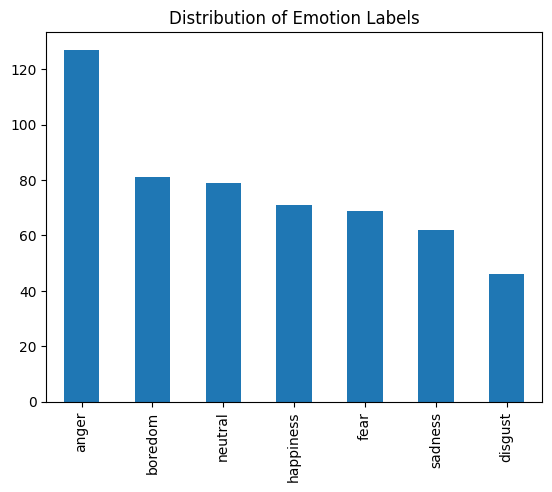

In [57]:
# look at the distribution of the target data
df['label'].value_counts().plot.bar()
plt.title('Distribution of Emotion Labels')
plt.show()

We can see and also know from the description in EmoDB that we have more data of anger whereas the others are slightly balanced. Anyways, we will be using macro-averaged metric calculation which means that we should not have any problem for evaluating the models. 

In [34]:
# drop unnecessary original information
df.drop(columns=['file', 'speaker', 'gender'], inplace=True)

# Data Selection & Preprocessing for SVM, Decision Tree
Choose only features that include single numerical values. Lists or numpy arrays are too complex for these simple models.

In [48]:
# seperate data from target variable
y = df['label']
X = df.drop('label', axis=1)

# choose only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_prep = X.select_dtypes(include=numerics)

# encode the target variable into a numeric value
label_enc = preprocessing.LabelEncoder()
y_prep = pd.DataFrame(label_enc.fit_transform(y), columns=['label'])

# scale numerical features with StandardScaler
scaler = preprocessing.StandardScaler()
X_prep[X_prep.columns] = scaler.fit_transform(X_prep[X_prep.columns]) 

# create and save preprocessed dataset
df_prep = pd.concat([X_prep, y_prep], axis=1)
df_prep.to_pickle('../results/df_prep_numerical_only.pkl')
df_prep.head()

,duration,mean,median,max,min,var,std,speaking_rate,articulation_rate,asd,f1_median,f1_max,f1_mean,f1_std,f1_var,f2_median,f2_max,f2_mean,f2_std,f2_var,f3_median,f3_max,f3_mean,f3_std,f3_var,f4_median,f4_max,f4_mean,f4_std,f4_var,f0_max,f0_min,f0_mean,f0_median,f0_var,zcr_max,zcr_min,zcr_mean,zcr_median,zcr_var,rms_max,rms_min,rms_mean,rms_median,rms_var,log_rms_max,log_rms_min,log_rms_mean,log_rms_median,log_rms_var,amplitude_max,amplitude_min,amplitude_mean,amplitude_median,amplitude_var,spectral_centroid_max,spectral_centroid_min,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_var,energy_max,energy_mean,energy_var,energy_rising_duration_max,energy_rising_duration_mean,energy_rising_duration_median,energy_rising_duration_iqr,energy_falling_duration_max,energy_falling_duration_mean,energy_falling_duration_median,energy_falling_duration_iqr,energy_rising_value_max,energy_rising_value_mean,energy_rising_value_median,energy_rising_value_iqr,energy_falling_value_max,energy_falling_value_mean,energy_falling_value_median,energy_falling_value_iqr,pitch_max,pitch_mean,pitch_var,pitch_rising_duration_max,pitch_rising_duration_mean,pitch_rising_duration_median,pitch_rising_duration_iqr,pitch_falling_duration_max,pitch_falling_duration_mean,pitch_falling_duration_median,pitch_falling_duration_iqr,pitch_rising_value_max,pitch_rising_value_mean,pitch_rising_value_median,pitch_rising_value_iqr,pitch_falling_value_max,pitch_falling_value_mean,pitch_falling_value_median,pitch_falling_value_iqr,skew_log_pitch,range_log_pitch,range_log_energy,mfccs0_mean,mfccs0_var,mfccs0_max,mfccs0_min,mfccs1_mean,mfccs1_var,mfccs1_max,mfccs1_min,mfccs2_mean,mfccs2_var,mfccs2_max,mfccs2_min,mfccs3_mean,mfccs3_var,mfccs3_max,mfccs3_min,mfccs4_mean,mfccs4_var,mfccs4_max,mfccs4_min,mfccs5_mean,mfccs5_var,mfccs5_max,mfccs5_min,mfccs6_mean,mfccs6_var,mfccs6_max,mfccs6_min,mfccs7_mean,mfccs7_var,mfccs7_max,mfccs7_min,mfccs8_mean,mfccs8_var,mfccs8_max,mfccs8_min,mfccs9_mean,mfccs9_var,mfccs9_max,mfccs9_min,mfccs10_mean,mfccs10_var,mfccs10_max,mfccs10_min,mfccs11_mean,mfccs11_var,mfccs11_max,mfccs11_min,mfccs12_mean,mfccs12_var,mfccs12_max,mfccs12_min,lpccs_local0_mean,lpccs_local0_var,lpccs_local0_max,lpccs_local0_min,lpccs_local1_mean,lpccs_local1_var,lpccs_local1_max,lpccs_local1_min,lpccs_local2_mean,lpccs_local2_var,lpccs_local2_max,lpccs_local2_min,lpccs_local3_mean,lpccs_local3_var,lpccs_local3_max,lpccs_local3_min,lpccs_local4_mean,lpccs_local4_var,lpccs_local4_max,lpccs_local4_min,lpccs_local5_mean,lpccs_local5_var,lpccs_local5_max,lpccs_local5_min,lpccs_local6_mean,lpccs_local6_var,lpccs_local6_max,lpccs_local6_min,lpccs_local7_mean,lpccs_local7_var,lpccs_local7_max,lpccs_local7_min,lpccs_local8_mean,lpccs_local8_var,lpccs_local8_max,lpccs_local8_min,lpccs_local9_mean,lpccs_local9_var,lpccs_local9_max,lpccs_local9_min,lpccs_local10_mean,lpccs_local10_var,lpccs_local10_max,lpccs_local10_min,lpccs_local11_mean,lpccs_local11_var,lpccs_local11_max,lpccs_local11_min,lpcmfccs_local0_mean,lpcmfccs_local0_var,lpcmfccs_local0_max,lpcmfccs_local0_min,lpcmfccs_local1_mean,lpcmfccs_local1_var,lpcmfccs_local1_max,lpcmfccs_local1_min,lpcmfccs_local2_mean,lpcmfccs_local2_var,lpcmfccs_local2_max,lpcmfccs_local2_min,lpcmfccs_local3_mean,lpcmfccs_local3_var,lpcmfccs_local3_max,lpcmfccs_local3_min,lpcmfccs_local4_mean,lpcmfccs_local4_var,lpcmfccs_local4_max,lpcmfccs_local4_min,lpcmfccs_local5_mean,lpcmfccs_local5_var,lpcmfccs_local5_max,lpcmfccs_local5_min,lpcmfccs_local6_mean,lpcmfccs_local6_var,lpcmfccs_local6_max,lpcmfccs_local6_min,lpcmfccs_local7_mean,lpcmfccs_local7_var,lpcmfccs_local7_max,lpcmfccs_local7_min,lpcmfccs_local8_mean,lpcmfccs_local8_var,lpcmfccs_local8_max,lpcmfccs_local8_min,lpcmfccs_local9_mean,lpcmfccs_local9_var,lpcmfccs_local9_max,lpcmfccs_local9_min,lpcmfccs_local10_mean,lpcmfccs_local10_var,lpcmfccs_local10_max,lpcmfccs_local10_min,lpcmfccs_local11_mean,lpcmfccs_local11_var,lpcmfccs_local11_max,lpcmfccs_local11_min,label
0,-0.858000

### Do the same but with 5 emotions only as in paper 3 (disgust, boredom, sadness, neutral, and happiness)

In [84]:
df_5emos = df[df['label'].isin(['disgust', 'boredom', 'sadness', 'neutral', 'happiness'])].reset_index()
df_5emos.shape

(339, 294)

This is actually also the size they describe in paper 3. 

In [88]:
np.unique(df_5emos['label'], return_inverse=True)[0]

array(['boredom', 'disgust', 'happiness', 'neutral', 'sadness'],
      dtype=object)

In [85]:
# seperate data from target variable
y = df_5emos['label']
X = df_5emos.drop('label', axis=1)

# choose only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_prep = X.select_dtypes(include=numerics)

# encode the target variable into a numeric value
label_enc = preprocessing.LabelEncoder()
y_prep = pd.DataFrame(label_enc.fit_transform(y), columns=['label'])

# scale numerical features with StandardScaler
scaler = preprocessing.StandardScaler()
X_prep[X_prep.columns] = scaler.fit_transform(X_prep[X_prep.columns]) 

# create and save preprocessed dataset
df_prep = pd.concat([X_prep, y_prep], axis=1)
df_prep.to_pickle('../results/df_prep_5emos_numerical_only.pkl')
df_prep.head()

,index,duration,mean,median,max,min,var,std,speaking_rate,articulation_rate,asd,f1_median,f1_max,f1_mean,f1_std,f1_var,f2_median,f2_max,f2_mean,f2_std,f2_var,f3_median,f3_max,f3_mean,f3_std,f3_var,f4_median,f4_max,f4_mean,f4_std,f4_var,f0_max,f0_min,f0_mean,f0_median,f0_var,zcr_max,zcr_min,zcr_mean,zcr_median,zcr_var,rms_max,rms_min,rms_mean,rms_median,rms_var,log_rms_max,log_rms_min,log_rms_mean,log_rms_median,log_rms_var,amplitude_max,amplitude_min,amplitude_mean,amplitude_median,amplitude_var,spectral_centroid_max,spectral_centroid_min,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_var,energy_max,energy_mean,energy_var,energy_rising_duration_max,energy_rising_duration_mean,energy_rising_duration_median,energy_rising_duration_iqr,energy_falling_duration_max,energy_falling_duration_mean,energy_falling_duration_median,energy_falling_duration_iqr,energy_rising_value_max,energy_rising_value_mean,energy_rising_value_median,energy_rising_value_iqr,energy_falling_value_max,energy_falling_value_mean,energy_falling_value_median,energy_falling_value_iqr,pitch_max,pitch_mean,pitch_var,pitch_rising_duration_max,pitch_rising_duration_mean,pitch_rising_duration_median,pitch_rising_duration_iqr,pitch_falling_duration_max,pitch_falling_duration_mean,pitch_falling_duration_median,pitch_falling_duration_iqr,pitch_rising_value_max,pitch_rising_value_mean,pitch_rising_value_median,pitch_rising_value_iqr,pitch_falling_value_max,pitch_falling_value_mean,pitch_falling_value_median,pitch_falling_value_iqr,skew_log_pitch,range_log_pitch,range_log_energy,mfccs0_mean,mfccs0_var,mfccs0_max,mfccs0_min,mfccs1_mean,mfccs1_var,mfccs1_max,mfccs1_min,mfccs2_mean,mfccs2_var,mfccs2_max,mfccs2_min,mfccs3_mean,mfccs3_var,mfccs3_max,mfccs3_min,mfccs4_mean,mfccs4_var,mfccs4_max,mfccs4_min,mfccs5_mean,mfccs5_var,mfccs5_max,mfccs5_min,mfccs6_mean,mfccs6_var,mfccs6_max,mfccs6_min,mfccs7_mean,mfccs7_var,mfccs7_max,mfccs7_min,mfccs8_mean,mfccs8_var,mfccs8_max,mfccs8_min,mfccs9_mean,mfccs9_var,mfccs9_max,mfccs9_min,mfccs10_mean,mfccs10_var,mfccs10_max,mfccs10_min,mfccs11_mean,mfccs11_var,mfccs11_max,mfccs11_min,mfccs12_mean,mfccs12_var,mfccs12_max,mfccs12_min,lpccs_local0_mean,lpccs_local0_var,lpccs_local0_max,lpccs_local0_min,lpccs_local1_mean,lpccs_local1_var,lpccs_local1_max,lpccs_local1_min,lpccs_local2_mean,lpccs_local2_var,lpccs_local2_max,lpccs_local2_min,lpccs_local3_mean,lpccs_local3_var,lpccs_local3_max,lpccs_local3_min,lpccs_local4_mean,lpccs_local4_var,lpccs_local4_max,lpccs_local4_min,lpccs_local5_mean,lpccs_local5_var,lpccs_local5_max,lpccs_local5_min,lpccs_local6_mean,lpccs_local6_var,lpccs_local6_max,lpccs_local6_min,lpccs_local7_mean,lpccs_local7_var,lpccs_local7_max,lpccs_local7_min,lpccs_local8_mean,lpccs_local8_var,lpccs_local8_max,lpccs_local8_min,lpccs_local9_mean,lpccs_local9_var,lpccs_local9_max,lpccs_local9_min,lpccs_local10_mean,lpccs_local10_var,lpccs_local10_max,lpccs_local10_min,lpccs_local11_mean,lpccs_local11_var,lpccs_local11_max,lpccs_local11_min,lpcmfccs_local0_mean,lpcmfccs_local0_var,lpcmfccs_local0_max,lpcmfccs_local0_min,lpcmfccs_local1_mean,lpcmfccs_local1_var,lpcmfccs_local1_max,lpcmfccs_local1_min,lpcmfccs_local2_mean,lpcmfccs_local2_var,lpcmfccs_local2_max,lpcmfccs_local2_min,lpcmfccs_local3_mean,lpcmfccs_local3_var,lpcmfccs_local3_max,lpcmfccs_local3_min,lpcmfccs_local4_mean,lpcmfccs_local4_var,lpcmfccs_local4_max,lpcmfccs_local4_min,lpcmfccs_local5_mean,lpcmfccs_local5_var,lpcmfccs_local5_max,lpcmfccs_local5_min,lpcmfccs_local6_mean,lpcmfccs_local6_var,lpcmfccs_local6_max,lpcmfccs_local6_min,lpcmfccs_local7_mean,lpcmfccs_local7_var,lpcmfccs_local7_max,lpcmfccs_local7_min,lpcmfccs_local8_mean,lpcmfccs_local8_var,lpcmfccs_local8_max,lpcmfccs_local8_min,lpcmfccs_local9_mean,lpcmfccs_local9_var,lpcmfccs_local9_max,lpcmfccs_local9_min,lpcmfccs_local10_mean,lpcmfccs_local10_var,lpcmfccs_local10_max,lpcmfccs_local10_min,lpcmfccs_local11_mean,lpcmfccs_local11_var,lpcmfccs_local11_max,lpcmfccs_local11_min,label
0,-1.